# Aplicación del modelo elegido, XGBClassifier

Como ya hemos visto en la comparativa de modelos, nuestro modelo elegido será el XGBClassifier con los hiperparámetros más óptimos según la métrica 'Recall Score' y tras hacer el GridSearchCV.

Importamos las librerias necesarias:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Importamos el dataset ya preparado:

In [2]:
data = pd.read_csv('../data/processed/dataset_modelo.csv')
data

,google_index,page_rank,nb_hyperlinks,web_traffic,nb_www,domain_age,ratio_extHyperlinks,longest_word_path,phish_hints,ratio_intHyperlinks,...,ratio_extRedirection,shortest_word_host,ratio_digits_host,nb_slash,shortest_word_path,domain_in_title,nb_dots,nb_hyphens,avg_words_raw,status
0,1,4,17,0,1,-1,0.470588,6,0,0.529412,...,0.875000,3,0.000000,3,3,0,3,0,5.750000,0
1,1,2,30,0,0,5767,0.033333,32,0,0.966667,...,0.000000,19,0.000000,5,2,1,1,0,15.750000,1
2,1,0,4,5828815,0,4004,0.000000,17,0,1.000000,...,0.000000,3,0.000000,5,2,1,4,1,8.250000,1
3,0,3,149,107721,0,-1,0.026846,0,0,0.973154,...,0.250000,5,0.000000,2,0,1,2,0,5.000000,0
4,0,6,102,8725,1,8175,0.529412,11,0,0.470588,...,0.537037,3,0.000000,5,4,0,2,2,6.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,6,199,3980,1,5396,0.115578,11,0,0.884422,...,0.043478,3,0.000000,4,8,0,2,0,7.750000,0
11426,1,0,3,0,1,6728,0.000000,8,0,1.000000,...,0.000000,3,0.000000,5,3,1,5,0,5.166667,1
11427,1,10,68,8,1,8515,0.529412,15,0,0.470588,...,0.000000,3,0.000000,5,1,0,2,6,6.153846,0
11428,0,4,32,2455493,1,2836,0.625000,0,0,0.375000,...,0.050000,3,0.000000,3,0,1,2,0,12.500000,0


Dividimos los datos en X e y. Utilizaremos como X todas las columnas excepto la columna 'status', que será nuestro vector y.

In [3]:
X = data.iloc[:, 1:-1]
y = data['status']

Dividimos en X_test, X_val, y_train, y_val.

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos el modelo:

In [12]:
xgb = XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1, subsample=0.9, early_stopping_rounds = 2)
xgb.fit(X_train,y_train, eval_set = [(X_val, y_val)])

[0]	validation_0-logloss:0.63482
[1]	validation_0-logloss:0.57480
[2]	validation_0-logloss:0.52696
[3]	validation_0-logloss:0.48777
[4]	validation_0-logloss:0.45150
[5]	validation_0-logloss:0.42186
[6]	validation_0-logloss:0.39423
[7]	validation_0-logloss:0.36961
[8]	validation_0-logloss:0.34493
[9]	validation_0-logloss:0.32477
[10]	validation_0-logloss:0.30700
[11]	validation_0-logloss:0.29261
[12]	validation_0-logloss:0.28078
[13]	validation_0-logloss:0.26663
[14]	validation_0-logloss:0.25488
[15]	validation_0-logloss:0.24556
[16]	validation_0-logloss:0.23724
[17]	validation_0-logloss:0.22956
[18]	validation_0-logloss:0.22154
[19]	validation_0-logloss:0.21383
[20]	validation_0-logloss:0.20734
[21]	validation_0-logloss:0.20150
[22]	validation_0-logloss:0.19764
[23]	validation_0-logloss:0.19171
[24]	validation_0-logloss:0.18791
[25]	validation_0-logloss:0.18373
[26]	validation_0-logloss:0.18060
[27]	validation_0-logloss:0.17774
[28]	validation_0-logloss:0.17467
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=2, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1, reg_lambda=0.1, ...)

Predecimos y vemos el recall:

In [13]:
pred_val = xgb.predict(X_val)
pred_train = xgb.predict(X_train)
print('Recall en train:',xgb.score(X_train, y_train))
print('Recall en validación:',recall_score(y_val, pred_val))

Recall en train: 0.988517060367454
Recall en validación: 0.95837023914969


Vemos la matriz de confusión con train y validación:

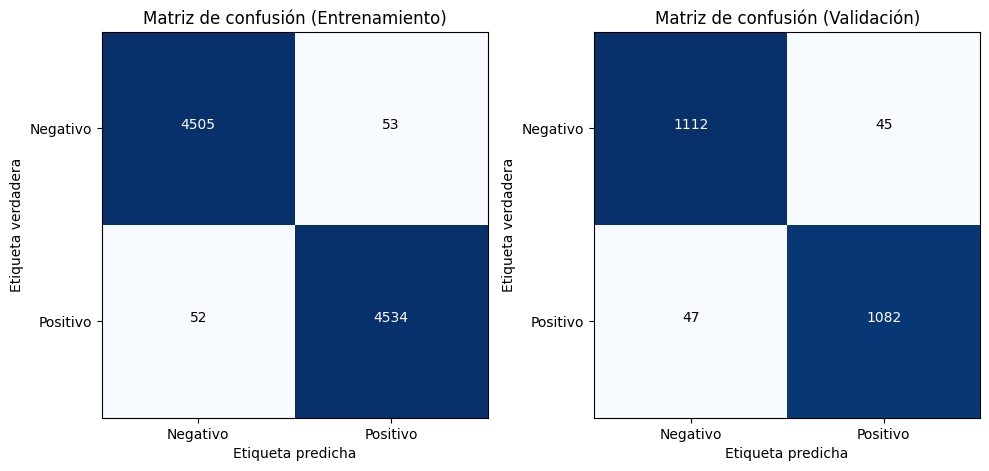

In [14]:
matriz_train = confusion_matrix(y_train, pred_train)
matriz_validacion = confusion_matrix(y_val, pred_val)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(matriz_train, cmap=plt.cm.Blues)
ax[0].set_title('Matriz de confusión (Entrenamiento)')
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(['Negativo', 'Positivo'])
ax[0].set_yticklabels(['Negativo', 'Positivo'])
ax[0].set_xlabel('Etiqueta predicha')
ax[0].set_ylabel('Etiqueta verdadera')

ax[1].imshow(matriz_validacion, cmap=plt.cm.Blues)
ax[1].set_title('Matriz de confusión (Validación)')
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].set_xticklabels(['Negativo', 'Positivo'])
ax[1].set_yticklabels(['Negativo', 'Positivo'])
ax[1].set_xlabel('Etiqueta predicha')
ax[1].set_ylabel('Etiqueta verdadera')

thresh_train = matriz_train.max() / 2.
thresh_val = matriz_validacion.max() / 2.
for i, j in np.ndindex(matriz_train.shape):
    ax[0].text(j, i, format(matriz_train[i, j], 'd'),
             horizontalalignment="center",
             color="white" if matriz_train[i, j] > thresh_train else "black")
    
for i, j in np.ndindex(matriz_validacion.shape):
    ax[1].text(j, i, format(matriz_validacion[i, j], 'd'),
             horizontalalignment="center",
             color="white" if matriz_validacion[i, j] > thresh_val else "black")

plt.tight_layout()
plt.show()